## Data Preprocessing

### Importing the libraries

In [53]:
import numpy as np
import pandas as pd

### Importing the dataset

In [54]:
dataset = pd.read_csv('dataset.csv', sep=";")
X = dataset.iloc[:, 0:21].values
y = dataset.iloc[:, 22].values

### Encoding cyclical continuous features


#### Months

In [55]:
months_in_year = 12
months = X[:, 1]

sin_month = np.sin(2*np.pi*months/months_in_year)
cos_month = np.cos(2*np.pi*months/months_in_year)

# remove month original collumn
X = np.delete(X, 1, 1)

# insert new collums features
X = np.insert(X, 1, sin_month, 1)
X = np.insert(X, 2, cos_month, 1)

#### hours

In [56]:
hours_in_day = 24
hours = X[:, 4]

sin_hour = np.sin(2*np.pi*hours/hours_in_day)
cos_hour = np.cos(2*np.pi*hours/hours_in_day)

# remove month original collumn
X = np.delete(X, 4, 1)

# insert new collums features
X = np.insert(X, 4, sin_hour, 1)
X = np.insert(X, 5, cos_hour, 1)

#### weekdays

In [57]:
number_of_weekdays = 7
weekdays = X[:, 6]

sin_weekdays = np.sin(2*np.pi*weekdays/number_of_weekdays)
cos_weekdays = np.cos(2*np.pi*weekdays/number_of_weekdays)

# remove month original collumn
X = np.delete(X, 6, 1)

# insert new collums features
X = np.insert(X, 6, sin_weekdays, 1)
X = np.insert(X, 7, cos_weekdays, 1)

### Splitting the dataset into the Training set and Test set

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

### Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Correlation matrix

In [60]:
values = np.insert(X, X.shape[1], y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1,0.085757,0.0272961,0.00195374,6.14327e-18,1.52312e-05,-0.0138034,0.00341257,0.000711398,0.0814717,0.0680176,0.0973975,0.0856124,0.120034,0.120034,0.164633,0.0844461,-0.00588424,0.0884156,0.10787,0.088886,0.0844841,-0.0559455,0.0739443,0.69849
1,0.085757,1,-0.00505619,-0.0148172,4.4091e-17,0.000183144,0.0100193,-0.00377083,0.0561538,-0.264507,-0.509839,-0.157584,0.43064,0.172442,0.172442,-0.00988793,0.549956,0.404676,0.290874,0.530567,-0.116017,0.514404,0.532452,0.361485,0.123344
2,0.0272961,-0.00505619,1,-0.00416651,-7.42469e-18,-0.000142249,-0.00933923,0.00405646,0.0419609,0.177249,0.0277692,0.275514,0.662893,0.481385,0.481385,0.433752,0.436792,0.48484,0.488784,0.471058,0.339915,0.446249,0.554177,0.544441,0.127223
3,0.00195374,-0.0148172,-0.00416651,1,-1.40396e-17,2.60049e-05,0.00066393,-0.000920882,-0.0593175,0.0345031,0.0150917,0.00351195,-0.0343501,0.0187521,0.0187521,-0.0359514,-0.0278812,-0.0114225,-0.0353379,-0.0215249,-0.0167751,-0.0171849,-0.0180165,-0.0323586,0.00785396
4,6.14327e-18,4.4091e-17,-7.42469e-18,-1.40396e-17,1,-3.71194e-17,4.45713e-17,2.00408e-17,-2.28045e-17,7.11929e-19,1.629e-18,-1.40295e-18,-2.64613e-18,-3.2079e-18,-3.2079e-18,-7.2064e-18,5.32524e-18,-5.70883e-19,-5.2061e-18,-1.71564e-18,8.42393e-19,-3.18715e-19,-3.27014e-18,-3.2882e-18,-0.44278
5,1.52312e-05,0.000183144,-0.000142249,2.60049e-05,-3.71194e-17,1,0.000164368,-0.000150317,-3.34087e-05,-0.000217332,-0.000208998,-0.000262744,-5.59224e-05,-0.000228103,-0.000228103,-0.000248535,-7.85658e-05,-5.58039e-05,-0.000113879,-8.47176e-05,-0.000175481,-0.000105675,-0.000103572,-7.34638e-05,-0.112427
6,-0.0138034,0.0100193,-0.00933923,0.00066393,4.45713e-17,0.000164368,1,0.00649345,0.0235564,-0.0282188,0.0132679,-0.0255795,0.0034082,-0.00892806,-0.00892806,0.0030068,0.016978,0.00320409,-0.0214408,0.000356663,0.00118823,-0.0136393,0.00888359,-0.000254327,0.215391
7,0.00341257,-0.00377083,0.00405646,-0.000920882,2.00408e-17,-0.000150317,0.00649345,1,-0.0189504,0.00441718,0.0158827,0.0107459,-0.00276995,-0.00876897,-0.00876897,-0.0046397,-0.0138764,-0.00393475,-0.009965,-0.0133701,-0.0190516,-0.000799672,0.00968024,-0.00177859,-0.121231
8,0.000711398,0.0561538,0.0419609,-0.0593175,-2.28045e-17,-3.34087e-05,0.0235564,-0.0189504,1,-0.00228755,-0.0342759,0.0103455,0.0440767,0.0324669,0.0324669,0.0339448,0.0505581,0.0419157,0.0412576,0.0469527,0.0239868,0.0506822,0.06648,0.0317479,-0.102613
9,0.0814717,-0.264507,0.177249,0.0345031,7.11929e-19,-0.000217332,-0.0282188,0.00441718,-0.00228755,1,0.225607,0.780497,0.0745809,0.475537,0.475537,0.139625,-0.0195852,0.192564,0.318656,-0.000637861,0.470395,0.165934,-0.0105059,0.222356,0.10818


# Neural Networking Training

## Importing Keras lib

In [61]:
import keras
from keras.models import Sequential # used to initialize the NN
from keras.layers import Dense # create the layers
from keras.callbacks import History

## Initialising ANN

In [76]:
network = Sequential()

## Adding layers

In [77]:
network.add(Dense(input_dim=X_train.shape[1], output_dim=X_train.shape[1]*2, activation='linear', init='uniform'))
network.add(Dense(output_dim=1, activation='linear', init='uniform'))

/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=24, activation="linear", units=48, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="uniform")`
  


## Compile and register history

In [78]:
network.compile(optimizer='adam', loss='mean_absolute_percentage_error')
history = History()

## Train

In [79]:
network.fit(X_train, y_train, epochs=50, callbacks=[history])
y_pred = network.predict(X_test)

Epoch 1/50
93339/93339 [==============================] - 2s 26us/step - loss: 99.2836
Epoch 2/50
93339/93339 [==============================] - 2s 24us/step - loss: 95.7891
Epoch 3/50
93339/93339 [==============================] - 2s 24us/step - loss: 89.9621
Epoch 4/50
93339/93339 [==============================] - 2s 25us/step - loss: 82.8519
Epoch 5/50
93339/93339 [==============================] - 2s 25us/step - loss: 74.9363
Epoch 6/50
93339/93339 [==============================] - 2s 25us/step - loss: 65.7310
Epoch 7/50
93339/93339 [==============================] - 2s 25us/step - loss: 56.1406
Epoch 8/50
93339/93339 [==============================] - 2s 24us/step - loss: 45.6899
Epoch 9/50
93339/93339 [==============================] - 2s 24us/step - loss: 33.8569
Epoch 10/50
93339/93339 [==============================] - 2s 25us/step - loss: 21.0240
Epoch 11/50
93339/93339 [==============================] - 2s 25us/step - loss: 10.5939
Epoch 12/50
93339/93339 [================

# Ploting results

## Ploting training loss function over epochs

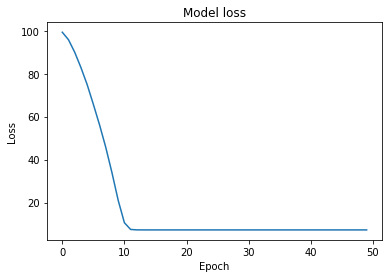

In [81]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Ploting data samples

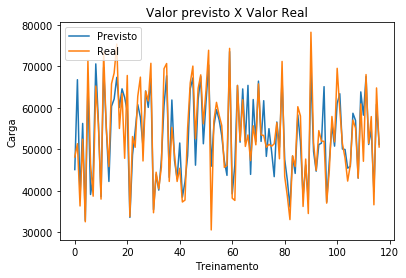

In [83]:
plt.plot([y_pred[n] for n in range(0, len(y_pred)) if n % 200 == 0])
plt.plot([y_test[n] for n in range(0, len(y_pred)) if n % 200 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()